# **Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)**


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [9]:

import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/Human_Development_Index_Dataset.csv"
df = pd.read_csv(path, encoding="latin1")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


1. Extract Latest Year:

In [10]:
df['year'].unique()

hdi_2022 = df[df['year'] == 2022].copy()

2. Data Exploration:

In [11]:
# First 10 rows
hdi_2022.head(10)

# Rows & columns
hdi_2022.shape

# Column names & data types
hdi_2022.dtypes


,0
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64
life_expec_m,float64


3. Missing Values & Data Cleaning:


In [12]:
# Missing values count
hdi_2022.isna().sum()

# Replace special characters
hdi_2022.replace(["—", "-", ".."], np.nan, inplace=True)

# Convert numeric columns
numeric_cols = ['hdi', 'life_expectancy', 'expec_yr_school',
                'mean_yr_school', 'gross_inc_percap']

for col in numeric_cols:
    hdi_2022[col] = pd.to_numeric(hdi_2022[col], errors='coerce')

# Remove duplicates
hdi_2022.drop_duplicates(inplace=True)

# Drop rows with missing HDI (core variable)
hdi_2022.dropna(subset=['hdi'], inplace=True)


4. Basic Statistics:

In [13]:
hdi_2022['hdi'].mean()
hdi_2022['hdi'].median()
hdi_2022['hdi'].std()

# Highest & Lowest HDI countries
hdi_2022.loc[hdi_2022['hdi'].idxmax()][['country','hdi']]


,5609
country,Switzerland
hdi,0.967


In [14]:
hdi_2022.loc[hdi_2022['hdi'].idxmin()][['country','hdi']]

,5345
country,Somalia
hdi,0.38


5. Filtering and Sorting:

In [15]:
# Filtering and Sorting based on HDI and Gross Income per Capita
high_hdi = hdi_2022[hdi_2022['hdi'] > 0.800]

top_10 = high_hdi.sort_values(
    by='gross_inc_percap', ascending=False
).head(10)

top_10[['country', 'hdi', 'gross_inc_percap']]


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


In [16]:
# Function to categorize HDI values
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022['HDI_Category'] = hdi_2022['hdi'].apply(hdi_category)

hdi_2022['HDI_Category'].value_counts()


,count
HDI_Category,
Very High,71
High,54
Medium,44
Low,35


In [17]:
hdi_2022.to_csv("HDI_category_added.csv", index=False)

# **Problem - 1B - HDI Visualization and Trend Analysis**

In [18]:
#Read dataframe

df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="latin1")

1. Data Extraction and Saving:

In [19]:
hdi_3yr = df[df['year'].isin([2020, 2021, 2022])].copy()

hdi_3yr.to_csv("HDI_problem1B.csv", index=False)

2. Data Cleaning:

In [20]:
#check misisng value
hdi_3yr[['country', 'year', 'hdi']].isna().sum()


,0
country,0
year,0
hdi,8


In [21]:
# Replace special characters
hdi_3yr.replace(["—", "-", ".."], np.nan, inplace=True)

# Convert numeric columns
hdi_3yr['hdi'] = pd.to_numeric(hdi_3yr['hdi'], errors='coerce')
hdi_3yr['gross_inc_percap'] = pd.to_numeric(
    hdi_3yr['gross_inc_percap'], errors='coerce'
)

# Remove duplicates
hdi_3yr.drop_duplicates(inplace=True)

# Drop rows with missing essential values
hdi_3yr.dropna(subset=['country', 'year', 'hdi'], inplace=True)

# Ensure consistent formatting
hdi_3yr['country'] = hdi_3yr['country'].str.strip()
hdi_3yr['year'] = hdi_3yr['year'].astype(int)


3. Visualization Tasks:

• A. Line Chart — HDI Trend (Country-Level):

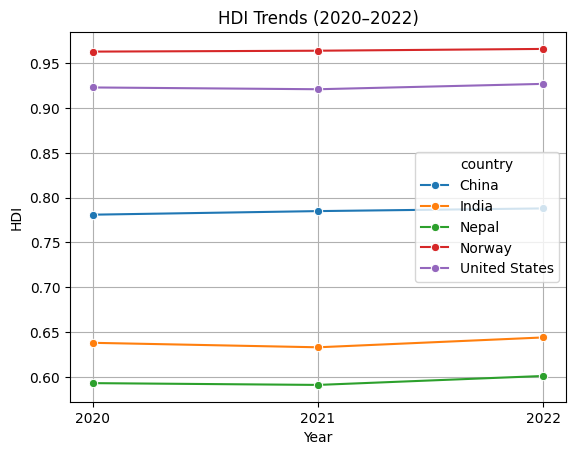

In [22]:
countries = ['Nepal', 'India', 'China', 'United States', 'Norway']
line_data = hdi_3yr[hdi_3yr['country'].isin(countries)]

plt.figure()
sns.lineplot(data=line_data, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trends (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.grid(True) # Add grid
plt.xticks(line_data['year'].unique()) # Set x-axis ticks to unique years
plt.show()

• B. Generate Visualizations:

 Bar Chart: Average HDI by Region (2020–2022)

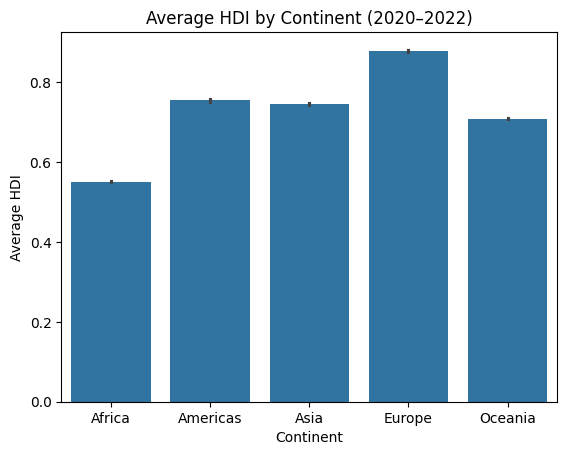

In [23]:
iso3_to_region = {

# ================= ASIA =================
"AFG":"Asia","ARM":"Asia","AZE":"Asia","BHR":"Asia","BGD":"Asia",
"BTN":"Asia","BRN":"Asia","KHM":"Asia","CHN":"Asia","CYP":"Asia",
"GEO":"Asia","IND":"Asia","IDN":"Asia","IRN":"Asia","IRQ":"Asia",
"ISR":"Asia","JPN":"Asia","JOR":"Asia","KAZ":"Asia","KWT":"Asia",
"KGZ":"Asia","LAO":"Asia","LBN":"Asia","MYS":"Asia","MDV":"Asia",
"MNG":"Asia","MMR":"Asia","NPL":"Asia","PRK":"Asia","OMN":"Asia",
"PAK":"Asia","PHL":"Asia","QAT":"Asia","SAU":"Asia","SGP":"Asia",
"KOR":"Asia","LKA":"Asia","SYR":"Asia","TJK":"Asia","THA":"Asia",
"TUR":"Asia","TKM":"Asia","ARE":"Asia","UZB":"Asia","VNM":"Asia",
"YEM":"Asia",

# ================= EUROPE =================
"ALB":"Europe","AUT":"Europe","BEL":"Europe","BGR":"Europe",
"BIH":"Europe","BLR":"Europe","CHE":"Europe","CZE":"Europe",
"DEU":"Europe","DNK":"Europe","ESP":"Europe","EST":"Europe",
"FIN":"Europe","FRA":"Europe","GBR":"Europe","GRC":"Europe",
"HRV":"Europe","HUN":"Europe","IRL":"Europe","ISL":"Europe",
"ITA":"Europe","LTU":"Europe","LUX":"Europe","LVA":"Europe",
"MDA":"Europe","MKD":"Europe","MLT":"Europe","MNE":"Europe",
"NLD":"Europe","NOR":"Europe","POL":"Europe","PRT":"Europe",
"ROU":"Europe","RUS":"Europe","SRB":"Europe","SVK":"Europe",
"SVN":"Europe","SWE":"Europe","UKR":"Europe",

# ================= AFRICA =================
"DZA":"Africa","AGO":"Africa","BEN":"Africa","BFA":"Africa",
"BWA":"Africa","CAF":"Africa","CIV":"Africa","CMR":"Africa",
"COD":"Africa","COG":"Africa","COM":"Africa","DJI":"Africa",
"EGY":"Africa","ERI":"Africa","ETH":"Africa","GAB":"Africa",
"GHA":"Africa","GIN":"Africa","GMB":"Africa","GNB":"Africa",
"KEN":"Africa","LBR":"Africa","LBY":"Africa","LSO":"Africa",
"MAR":"Africa","MDG":"Africa","MLI":"Africa","MOZ":"Africa",
"MRT":"Africa","MUS":"Africa","MWI":"Africa","NAM":"Africa",
"NER":"Africa","NGA":"Africa","RWA":"Africa","SDN":"Africa",
"SEN":"Africa","SLE":"Africa","SOM":"Africa","SSD":"Africa",
"STP":"Africa","TCD":"Africa","TGO":"Africa","TUN":"Africa",
"TZA":"Africa","UGA":"Africa","ZAF":"Africa","ZMB":"Africa",
"ZWE":"Africa",

# ================= AMERICAS =================
"ATG":"Americas","ARG":"Americas","BHS":"Americas","BLZ":"Americas",
"BOL":"Americas","BRA":"Americas","BRB":"Americas","CAN":"Americas",
"CHL":"Americas","COL":"Americas","CRI":"Americas","CUB":"Americas",
"DMA":"Americas","DOM":"Americas","ECU":"Americas","GRD":"Americas",
"GTM":"Americas","GUY":"Americas","HND":"Americas","HTI":"Americas",
"JAM":"Americas","MEX":"Americas","NIC":"Americas","PAN":"Americas",
"PER":"Americas","PRY":"Americas","SLV":"Americas","SUR":"Americas",
"TTO":"Americas","USA":"Americas","URY":"Americas","VEN":"Americas",

# ================= OCEANIA =================
"AUS":"Oceania","FJI":"Oceania","FSM":"Oceania","KIR":"Oceania",
"MHL":"Oceania","NRU":"Oceania","NZL":"Oceania","PLW":"Oceania",
"PNG":"Oceania","SLB":"Oceania","TON":"Oceania","TUV":"Oceania",
"VUT":"Oceania"
}


hdi_3yr['region'] = hdi_3yr['iso3'].map(iso3_to_region)


hdi_3yr['region'].isna().sum()

region_avg = (
    hdi_3yr.groupby(['region','year'])['hdi']
    .mean()
    .reset_index()
)

plt.figure()
sns.barplot(data=region_avg, x='region', y='hdi')
plt.title("Average HDI by Continent (2020–2022)")
plt.xlabel("Continent")
plt.ylabel("Average HDI")
plt.show()




– Box Plot: HDI Distribution for 2020, 2021, and 2022


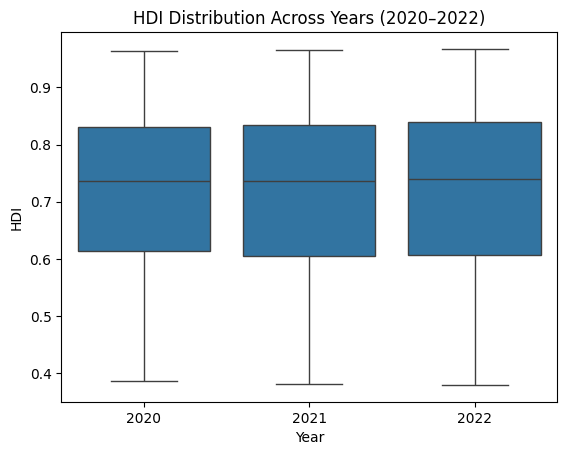

In [24]:
plt.figure()
sns.boxplot(data=hdi_3yr, x='year', y='hdi')
plt.title("HDI Distribution Across Years (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

HDI spread slightly narrows in 2021–2022, showing gradual recovery after COVID-19 disruptions.

-Scatter Plot: HDI vs. GNI per Capita

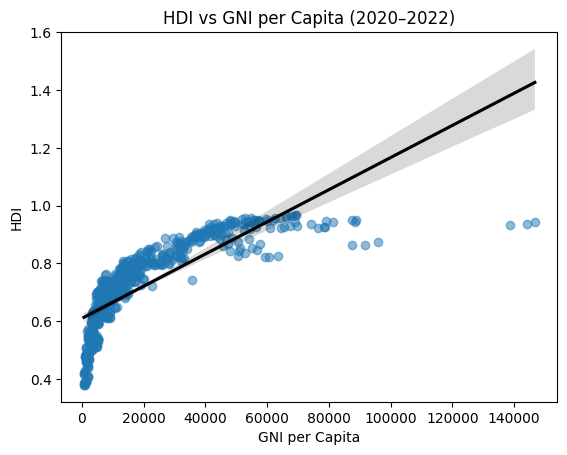

In [25]:
if 'gross_inc_percap' in hdi_3yr.columns:
    plt.figure()
    sns.regplot(
        data=hdi_3yr,
        x='gross_inc_percap',
        y='hdi',
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'black'}
    )
    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


4. Short Analysis Questions:

Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.
- COVID-19 negatively affected life expectancy and income

- Education disruptions slowed HDI growth in 2021

- 2022 shows recovery trends in most regions

# Problem 2: Advanced HDI Exploration

1. Create South Asia Subset:

In [26]:
#Define South Asian countries
south_asia = [
    "Afghanistan",
    "Bangladesh",
    "Bhutan",
    "India",
    "Maldives",
    "Nepal",
    "Pakistan",
    "Sri Lanka"
]


In [27]:
#Filter dataset
south_asia_df = df[df["country"].isin(south_asia)]

In [28]:
#Save filtered dataset
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)


2. Composite Development Score:

In [29]:
# Calculate Composite Development Score
south_asia_df['Composite_Score'] = (
    0.30 * south_asia_df['life_expectancy'] +  # 30% weight for life expectancy
    0.30 * south_asia_df['gross_inc_percap']   # 30% weight for gross income per capita
)

# Group by country and calculate the mean HDI and Composite Score
south_asia_avg= south_asia_df.groupby('country')[['hdi','Composite_Score']].mean().reset_index()

# Sort countries by Composite_Score in descending order to rank them
HDI_SouthAsia_Rank = south_asia_avg.sort_values(
    by='Composite_Score',
    ascending=False
)

# Display the country and its Composite_Score
HDI_SouthAsia_Rank[['country', 'Composite_Score']]


/tmp/ipython-input-977121776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite_Score'] = (


,country,Composite_Score
4,Maldives,4154.252676
7,Sri Lanka,2502.612949
2,Bhutan,1878.321569
6,Pakistan,1184.282350
3,India,1151.101140
1,Bangladesh,1042.583232
5,Nepal,779.209282
0,Afghanistan,555.454413


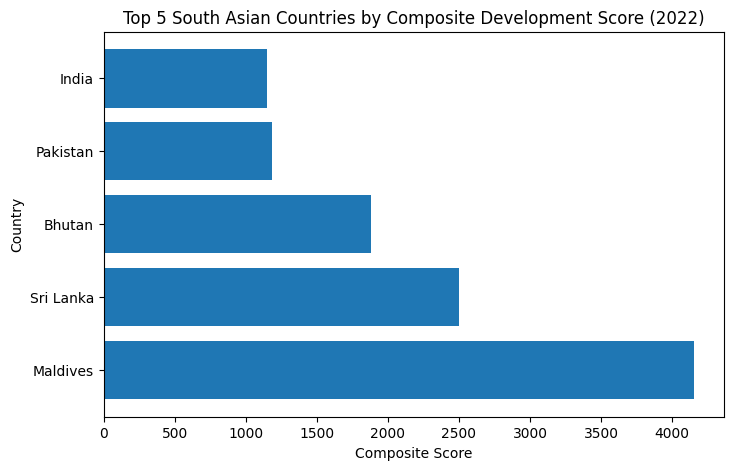

In [30]:
# Select the top 5 countries from the ranked DataFrame based on Composite_Score
top5 = HDI_SouthAsia_Rank.head(5)

# Create a new figure for the plot with a specified size
plt.figure(figsize=(8, 5))

# Create a horizontal bar chart
# The y-axis represents the country names and the x-axis represents their Composite Scores
plt.barh(top5["country"], top5["Composite_Score"])
# Set the label for the x-axis
plt.xlabel("Composite Score")
# Set the label for the y-axis
plt.ylabel("Country")
# Set the title of the plot
plt.title("Top 5 South Asian Countries by Composite Development Score (2022)")
# Display the plot
plt.show()

3. Outlier Detection:

In [31]:
# Calculate the first quartile (Q1) for 'hdi'
Q1_hdi = south_asia_df['hdi'].quantile(0.25)
# Calculate the third quartile (Q3) for 'hdi'
Q3_hdi = south_asia_df['hdi'].quantile(0.75)
# Calculate the Interquartile Range (IQR) for 'hdi'
IQR_hdi = Q3_hdi - Q1_hdi

# Calculate the first quartile (Q1) for 'gross_inc_percap'
Q1_gni = south_asia_df['gross_inc_percap'].quantile(0.25)
# Calculate the third quartile (Q3) for 'gross_inc_percap'
Q3_gni = south_asia_df['gross_inc_percap'].quantile(0.75)
# Calculate the Interquartile Range (IQR) for 'gross_inc_percap'
IQR_gni = Q3_gni - Q1_gni

In [32]:
south_asia_df['Outlier'] = (
    (south_asia_df['hdi'] < Q1_hdi - 1.5 * IQR_hdi) |
    (south_asia_df['hdi'] > Q3_hdi + 1.5 * IQR_hdi) |
    (south_asia_df['gross_inc_percap'] < Q1_gni - 1.5 * IQR_gni) |
    (south_asia_df['gross_inc_percap'] > Q3_gni + 1.5 * IQR_gni)
)

south_asia_df[['country', 'hdi', 'gross_inc_percap', 'Outlier']]


/tmp/ipython-input-1730535864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Outlier'] = (


,country,hdi,gross_inc_percap,Outlier
0,Afghanistan,0.284,3115.670448,False
1,Afghanistan,0.292,2817.304736,False
2,Afghanistan,0.299,2474.681985,False
3,Afghanistan,0.307,1723.019763,False
4,Afghanistan,0.300,1202.010488,False
...,...,...,...,...
5473,Sri Lanka,0.774,13405.803690,True
5474,Sri Lanka,0.775,13262.958220,False
5475,Sri Lanka,0.777,12589.806450,False
5476,Sri Lanka,0.783,12958.822260,False


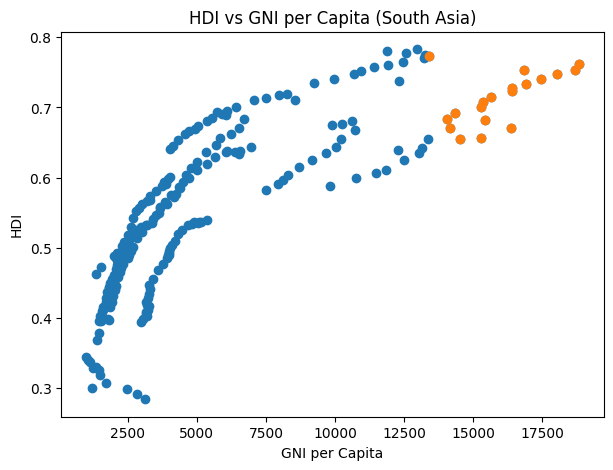

In [33]:
plt.figure(figsize=(7, 5))

plt.scatter(
    south_asia_df['gross_inc_percap'],
    south_asia_df['hdi']
)

# Highlight outliers
outliers = south_asia_df[south_asia_df['Outlier']]
plt.scatter(
    outliers['gross_inc_percap'],
    outliers['hdi']
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (South Asia)")
plt.show()


Discuss why the identified countries stand out as outliers.   

*   Outliers identified by the IQR method include high-income UAE and Qatar, and conflict-affected Afghanistan and Yemen

4. Exploring Metric Relationships:

In [34]:
metric_df = south_asia_df[
    ['country', 'hdi', 'gender_development', 'life_expectancy']
]

metric_df

,country,hdi,gender_development,life_expectancy
0,Afghanistan,0.284,NaN,45.967
1,Afghanistan,0.292,NaN,46.663
2,Afghanistan,0.299,NaN,47.596
3,Afghanistan,0.307,NaN,51.466
4,Afghanistan,0.300,NaN,51.495
...,...,...,...,...
5473,Sri Lanka,0.774,0.965,75.748
5474,Sri Lanka,0.775,0.962,76.008
5475,Sri Lanka,0.777,0.960,76.393
5476,Sri Lanka,0.783,0.943,76.399


In [35]:
gender_corr = metric_df['hdi'].corr(metric_df['gender_development'])
life_corr = metric_df['hdi'].corr(metric_df['life_expectancy'])

print("HDI vs Gender Development:", gender_corr)
print("HDI vs Life Expectancy:", life_corr)


HDI vs Gender Development: 0.8656210050127539
HDI vs Life Expectancy: 0.9587610559043978


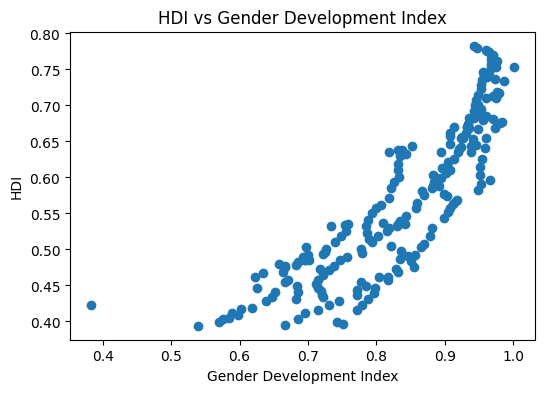

In [36]:
plt.figure(figsize=(6, 4))
plt.scatter(metric_df['gender_development'], metric_df['hdi'])
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development Index")
plt.show()


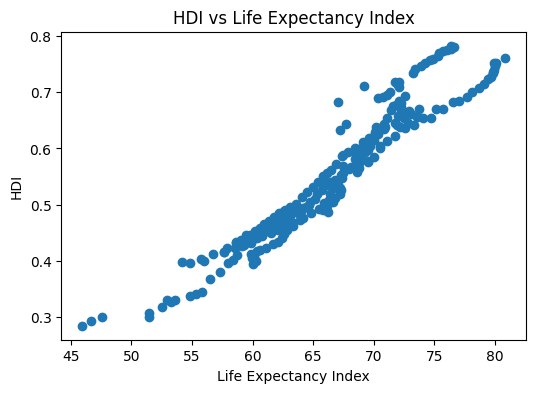

In [37]:
plt.figure(figsize=(6, 4))
plt.scatter(metric_df['life_expectancy'], metric_df['hdi'])
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy Index")
plt.show()


Discuss:

Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

*   Life expectancy correlates more strongly with HDI, while gender development shows a weaker and less consistent relationship.



5. Gap Analysis:

In [38]:
south_asia_df['gni_hdi_gap'] = (
    south_asia_df['gross_inc_percap'] - south_asia_df['hdi']
)

south_asia_df[['country', 'gni_hdi_gap']]


/tmp/ipython-input-3216445507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['gni_hdi_gap'] = (


,country,gni_hdi_gap
0,Afghanistan,3115.386448
1,Afghanistan,2817.012736
2,Afghanistan,2474.382985
3,Afghanistan,1722.712763
4,Afghanistan,1201.710488
...,...,...
5473,Sri Lanka,13405.029690
5474,Sri Lanka,13262.183220
5475,Sri Lanka,12589.029450
5476,Sri Lanka,12958.039260


In [39]:
gap_desc = south_asia_df.sort_values(
    by='gni_hdi_gap',
    ascending=False
)

gap_desc[['country', 'gni_hdi_gap']]


,country,gni_hdi_gap
3530,Maldives,18846.03019
3527,Maldives,18679.17236
3526,Maldives,18054.97765
3525,Maldives,17473.90201
3524,Maldives,16910.72022
...,...,...
3498,Maldives,NaN
3499,Maldives,NaN
3500,Maldives,NaN
3501,Maldives,NaN


In [40]:
gap_asc = south_asia_df.sort_values(
    by='gni_hdi_gap',
    ascending=True
)

gap_asc[['country', 'gni_hdi_gap']]


,country,gni_hdi_gap
11,Afghanistan,980.789554
10,Afghanistan,1047.002686
9,Afghanistan,1121.985570
4,Afghanistan,1201.710488
8,Afghanistan,1226.964565
...,...,...
3498,Maldives,NaN
3499,Maldives,NaN
3500,Maldives,NaN
3501,Maldives,NaN


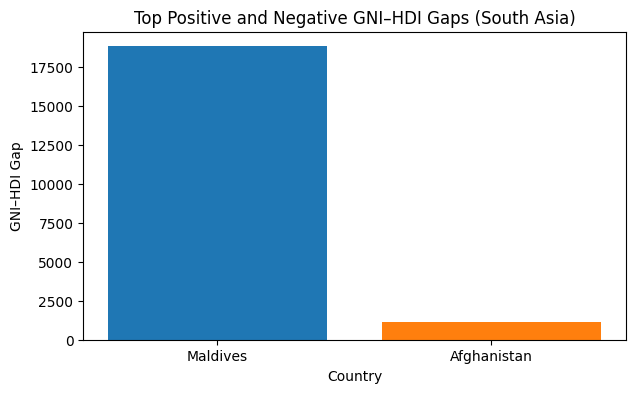

In [41]:
top_positive = gap_desc.head(3)
top_negative = gap_asc.head(3)

plt.figure(figsize=(7, 4))

plt.bar(top_positive['country'], top_positive['gni_hdi_gap'])
plt.bar(top_negative['country'], top_negative['gni_hdi_gap'])

plt.xlabel("Country")
plt.ylabel("GNI–HDI Gap")
plt.title("Top Positive and Negative GNI–HDI Gaps (South Asia)")
plt.show()


Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

*   When GNI is high but HDI remains low, it indicates inequality and insufficient investment in education and healthcare sectors.



# Problem 3 : Comparative Regional Analysis: South Asia vs Middle East

1. Create Middle East Subset:

In [42]:
df = pd.read_csv("HDI_problem1B.csv")
df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
1,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
2,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
3,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
4,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


In [43]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]


In [44]:
df_south_asia = df[df['country'].isin(south_asia)]
df_middle_east = df[df['country'].isin(middle_east)]


In [45]:
df_south_asia.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
df_middle_east.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


In [46]:
south_stats = df_south_asia['hdi'].agg(['mean', 'std'])
middle_stats = df_middle_east['hdi'].agg(['mean', 'std'])

south_stats, middle_stats


(mean    0.639583
 std     0.098273
 Name: hdi, dtype: float64,
 mean    0.788909
 std     0.141295
 Name: hdi, dtype: float64)

3. Top and Bottom Performers:

In [47]:
top_sa = df_south_asia.groupby('country')['hdi'].mean().sort_values(ascending=False).head(3)
bottom_sa = df_south_asia.groupby('country')['hdi'].mean().sort_values().head(3)

top_me = df_middle_east.groupby('country')['hdi'].mean().sort_values(ascending=False).head(3)
bottom_me = df_middle_east.groupby('country')['hdi'].mean().sort_values().head(3)


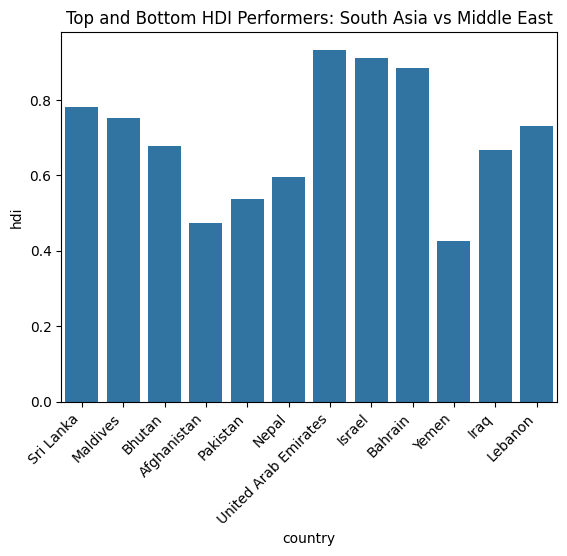

In [48]:
compare_df = pd.concat([
    top_sa, bottom_sa, top_me, bottom_me
]).reset_index()

plt.figure()
sns.barplot(data=compare_df, x='country', y='hdi')
plt.title("Top and Bottom HDI Performers: South Asia vs Middle East")
plt.xticks(rotation=45,ha="right")
plt.show()


4. Metric Comparisons:

In [49]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

comparison = pd.DataFrame({
    'South Asia': df_south_asia[metrics].mean(),
    'Middle East': df_middle_east[metrics].mean()
}).reset_index().rename(columns={'index': 'Metric'})


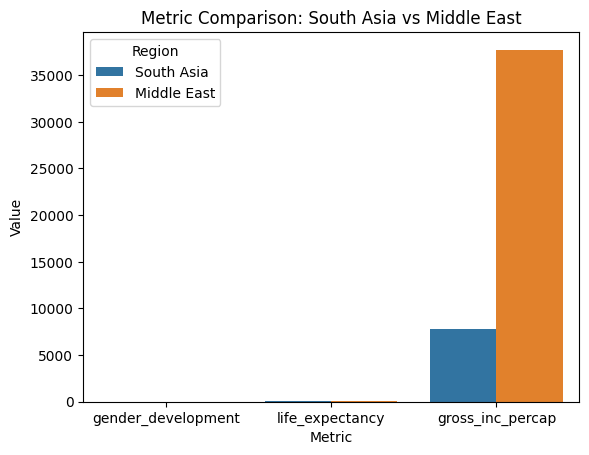

In [50]:
comparison_melted = comparison.melt(id_vars='Metric', var_name='Region', value_name='Value')

plt.figure()
sns.barplot(data=comparison_melted, x='Metric', y='Value', hue='Region')
plt.title("Metric Comparison: South Asia vs Middle East")
plt.show()


5. HDI Disparity:

In [51]:
def hdi_disparity(df_region):
    hdi_range = df_region['hdi'].max() - df_region['hdi'].min()
    cv = df_region['hdi'].std() / df_region['hdi'].mean()
    return hdi_range, cv

sa_range, sa_cv = hdi_disparity(df_south_asia)
me_range, me_cv = hdi_disparity(df_middle_east)

sa_range, sa_cv, me_range, me_cv


(0.321,
 np.float64(0.1536520924690084),
 0.5130000000000001,
 np.float64(0.17910145193048382))

6. Correlation Analysis:

In [52]:
df_south_asia[['hdi', 'gender_development']].corr()
df_middle_east[['hdi', 'gender_development']].corr()


,hdi,gender_development
hdi,1.00000,0.93567
gender_development,0.93567,1.00000


In [53]:
df_south_asia[['hdi', 'life_expectancy']].corr()
df_middle_east[['hdi', 'life_expectancy']].corr()


,hdi,life_expectancy
hdi,1.000000,0.933123
life_expectancy,0.933123,1.000000


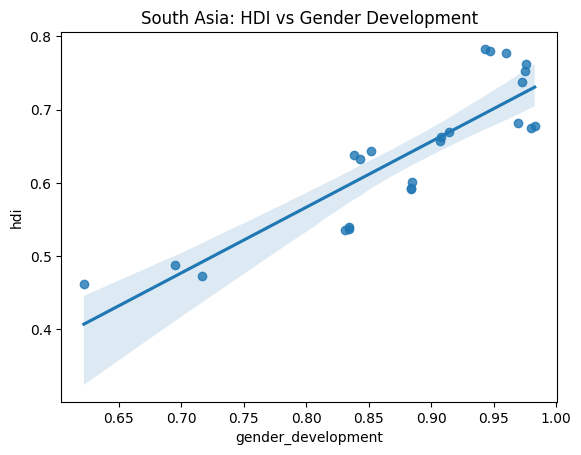

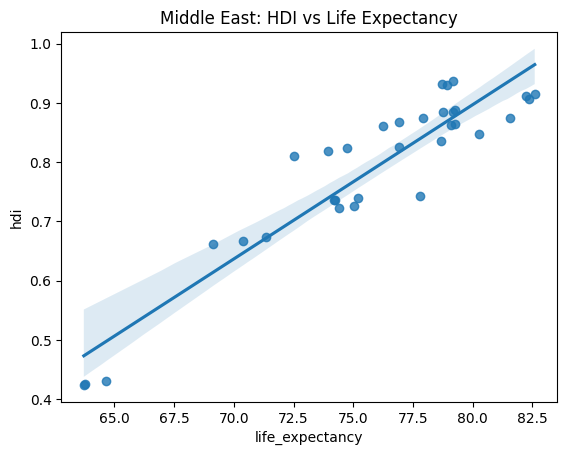

In [54]:
plt.figure()
sns.regplot(data=df_south_asia, x='gender_development', y='hdi')
plt.title("South Asia: HDI vs Gender Development")
plt.show()

plt.figure()
sns.regplot(data=df_middle_east, x='life_expectancy', y='hdi')
plt.title("Middle East: HDI vs Life Expectancy")
plt.show()


7. Outlier Detection:

In [55]:
def detect_outliers(df_region, column):
    Q1 = df_region[column].quantile(0.25)
    Q3 = df_region[column].quantile(0.75)
    IQR = Q3 - Q1
    return df_region[
        (df_region[column] < Q1 - 1.5 * IQR) |
        (df_region[column] > Q3 + 1.5 * IQR)
    ]


In [56]:
sa_outliers_hdi = detect_outliers(df_south_asia, 'hdi')
me_outliers_gni = detect_outliers(df_middle_east, 'gross_inc_percap')


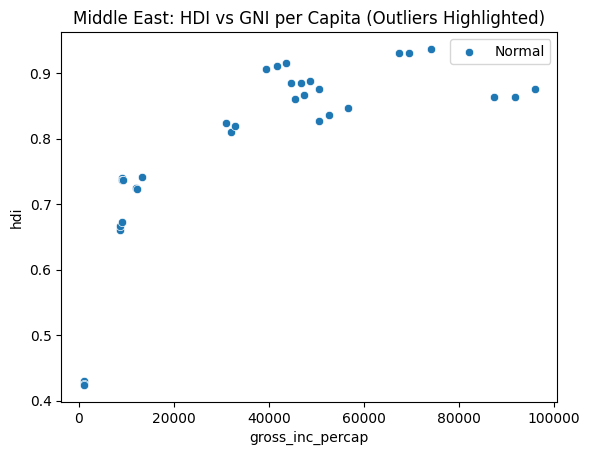

In [57]:
# Scatter plot for HDI vs GNI per Capita in the Middle East, highlighting outliers
plt.figure()
sns.scatterplot(data=df_middle_east, x='gross_inc_percap', y='hdi', label='Normal')
sns.scatterplot(data=me_outliers_gni, x='gross_inc_percap', y='hdi', color='red', label='Outliers')
plt.title("Middle East: HDI vs GNI per Capita (Outliers Highlighted)")
plt.show()

Discuss the significance of these outliers.

*  Outliers reveal countries where income and human development differ greatly, highlighting inequality, exceptional policies, or unusual economic conditions.

